In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [24]:
import matplotlib as mpl ; mpl.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from mpl_toolkits import mplot3d
plt.rc('axes', unicode_minus=False)

In [29]:
epl=pd.read_csv('/content/gdrive/My Drive/epl.csv')
epl2=pd.read_csv('/content/gdrive/My Drive/epl2.csv')
epl2 = epl2[(epl2['tournament']=='Premier League') & (epl2['season'].isin(['2018/2019', '2019/2020']))].reset_index(drop=True)
movies=pd.read_csv('/content/gdrive/My Drive/movies.csv')

In [3]:
movie = movies.dropna(axis=0)

In [4]:

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


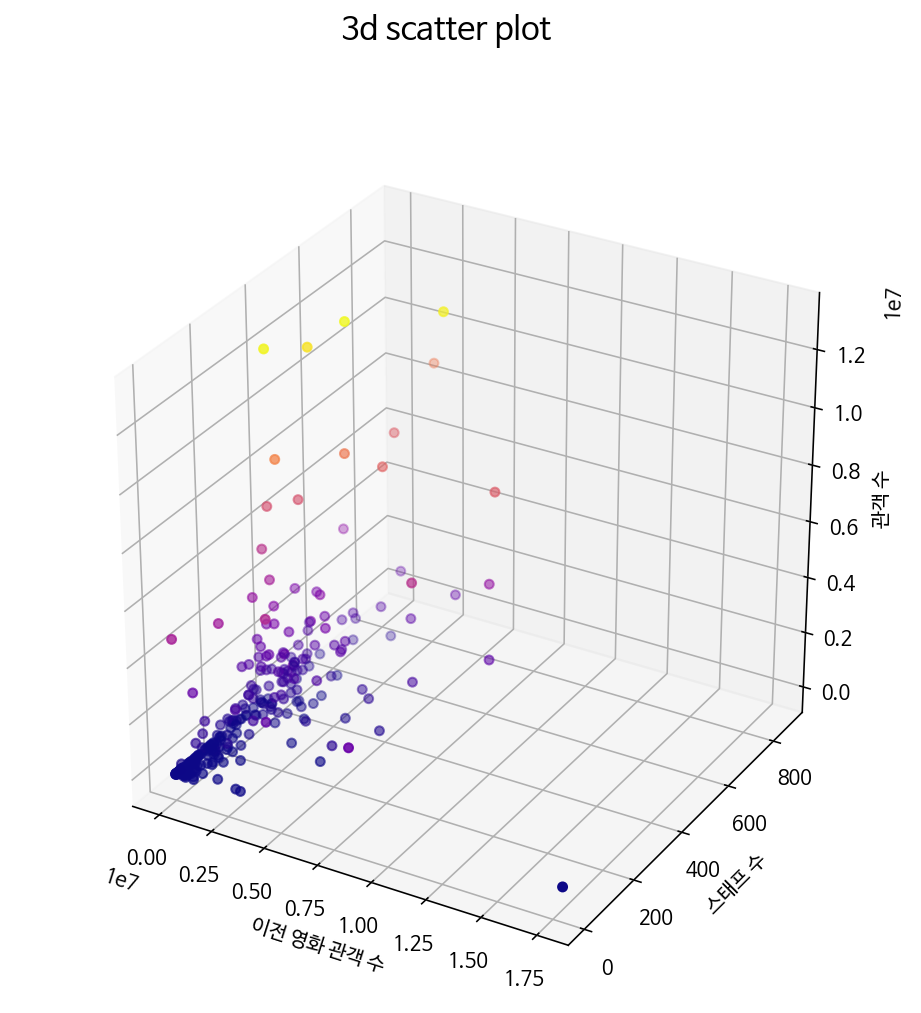

In [5]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(movie['dir_prev_bfnum'], movie['num_staff'], movie['box_off_num'], c=movie['box_off_num'], cmap='plasma')
ax.set_xlabel('이전 영화 관객 수')
ax.set_ylabel('스태프 수')
ax.set_zlabel('관객 수', rotation=90)
fig.suptitle('3d scatter plot', fontsize=16)
plt.show()

In [6]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
epl.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


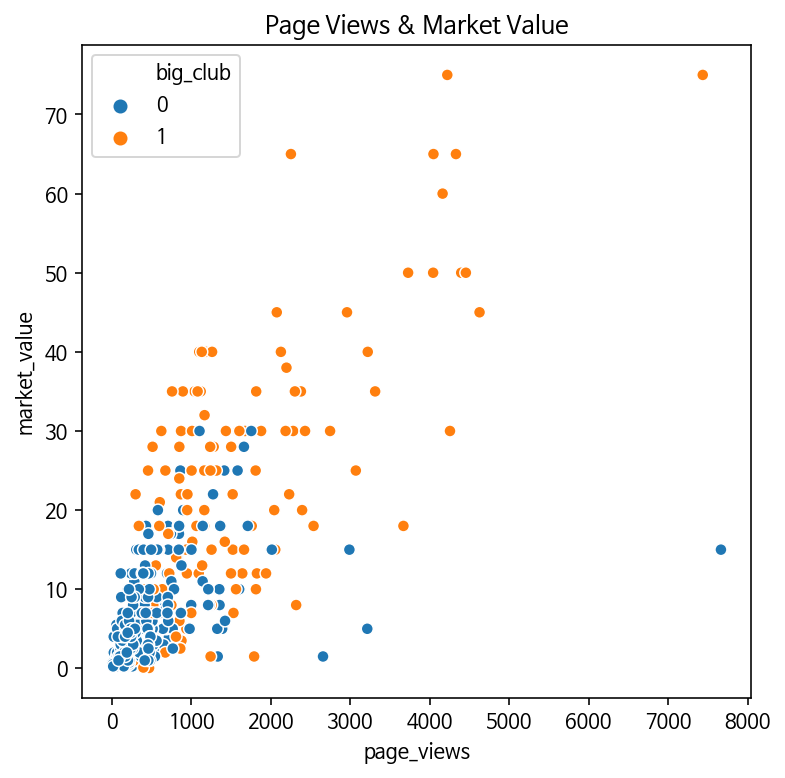

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x='page_views', y='market_value', data=epl, hue='big_club')
ax.set_title('Page Views & Market Value')
plt.show()

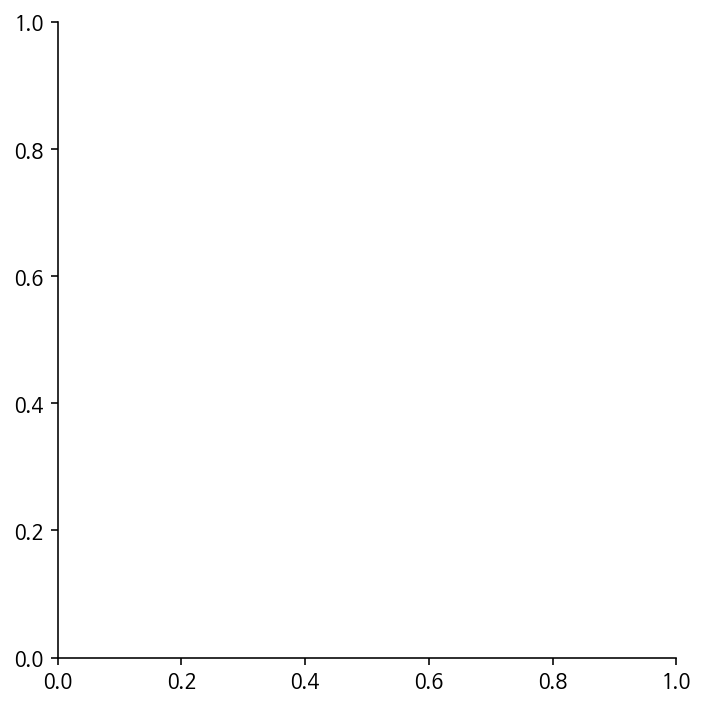

In [10]:
sns.FacetGrid(data=epl, height=5)
plt.show()

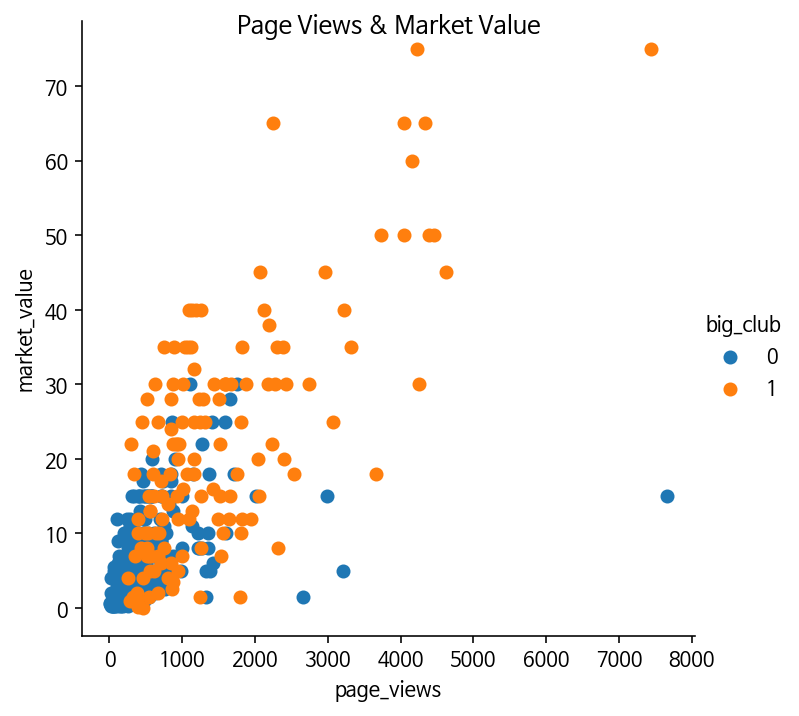

In [11]:
a = sns.FacetGrid(data=epl, hue='big_club', height=5)
a.map(plt.scatter, 'page_views', 'market_value').add_legend()
a.fig.suptitle('Page Views & Market Value')
plt.show()

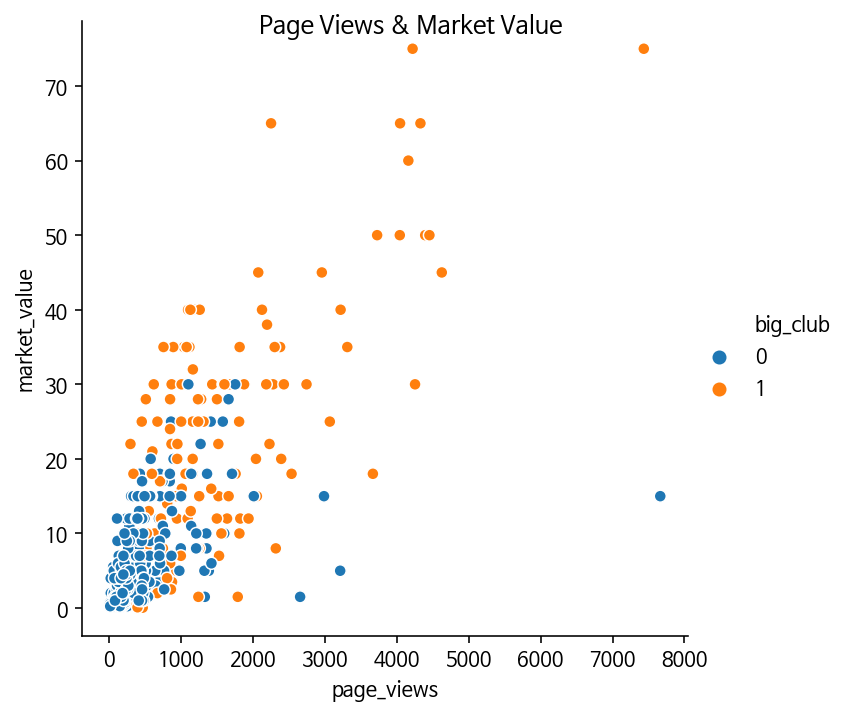

In [12]:
a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club')
a.fig.suptitle('Page Views & Market Value')
plt.show()

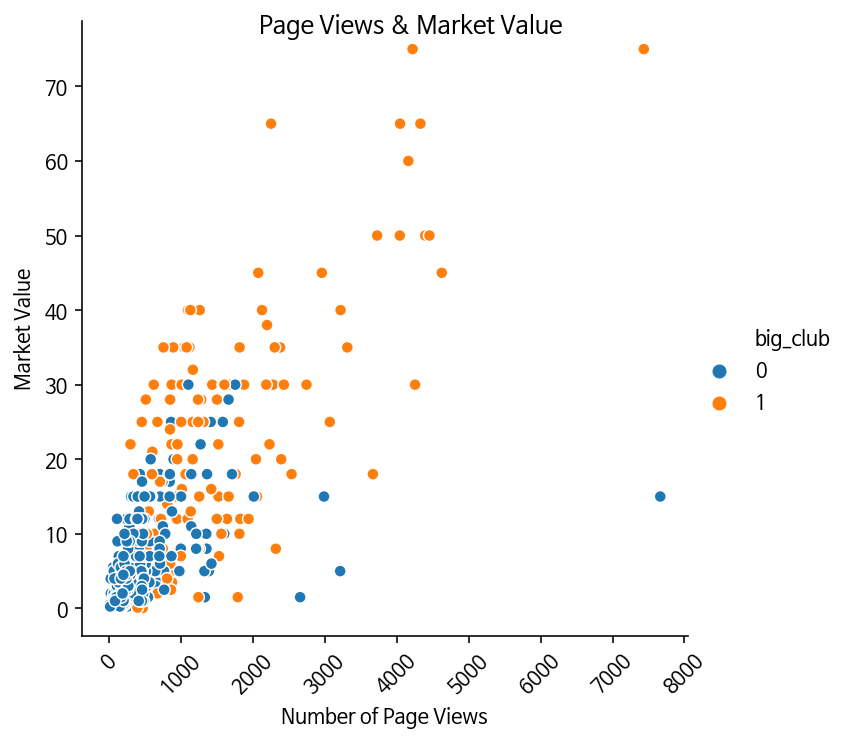

In [13]:
a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club', height=5, aspect=1)
a.fig.suptitle('Page Views & Market Value')
a.set_xlabels('Number of Page Views')
a.set_ylabels('Market Value')
a.set_xticklabels(rotation=45)
plt.show()

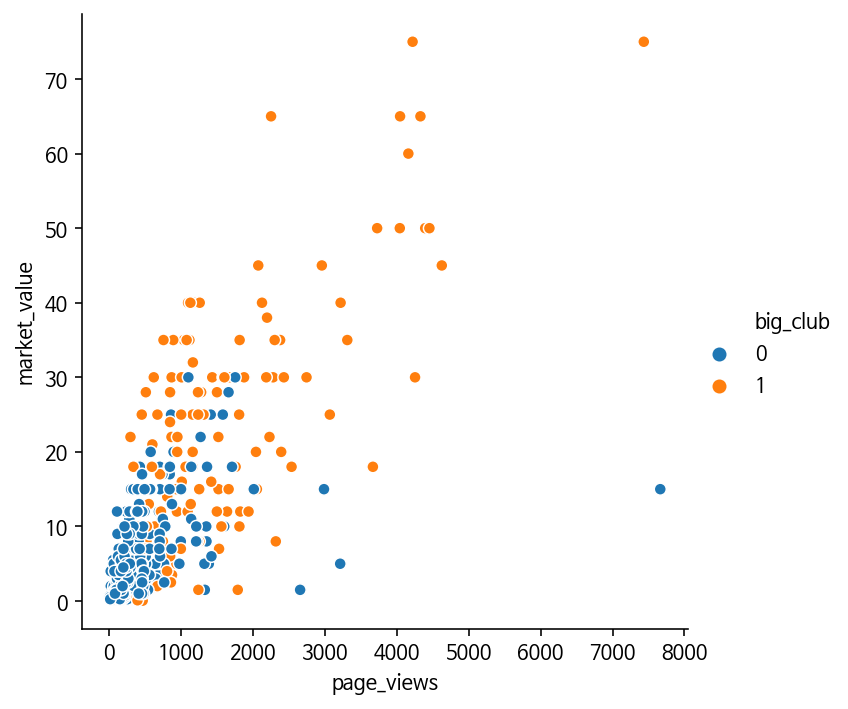

In [14]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club')
plt.show()

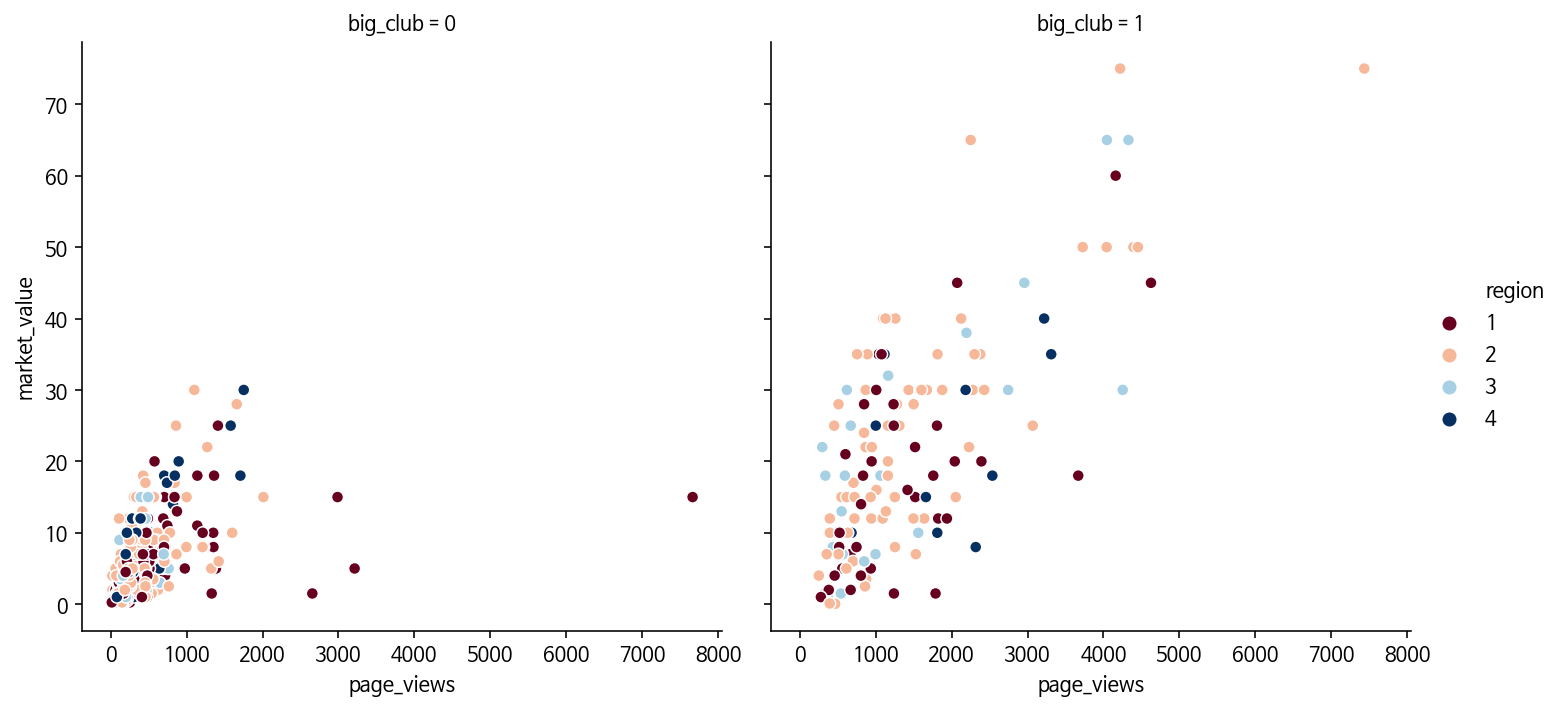

In [15]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='region', col='big_club', palette='RdBu')
plt.show()

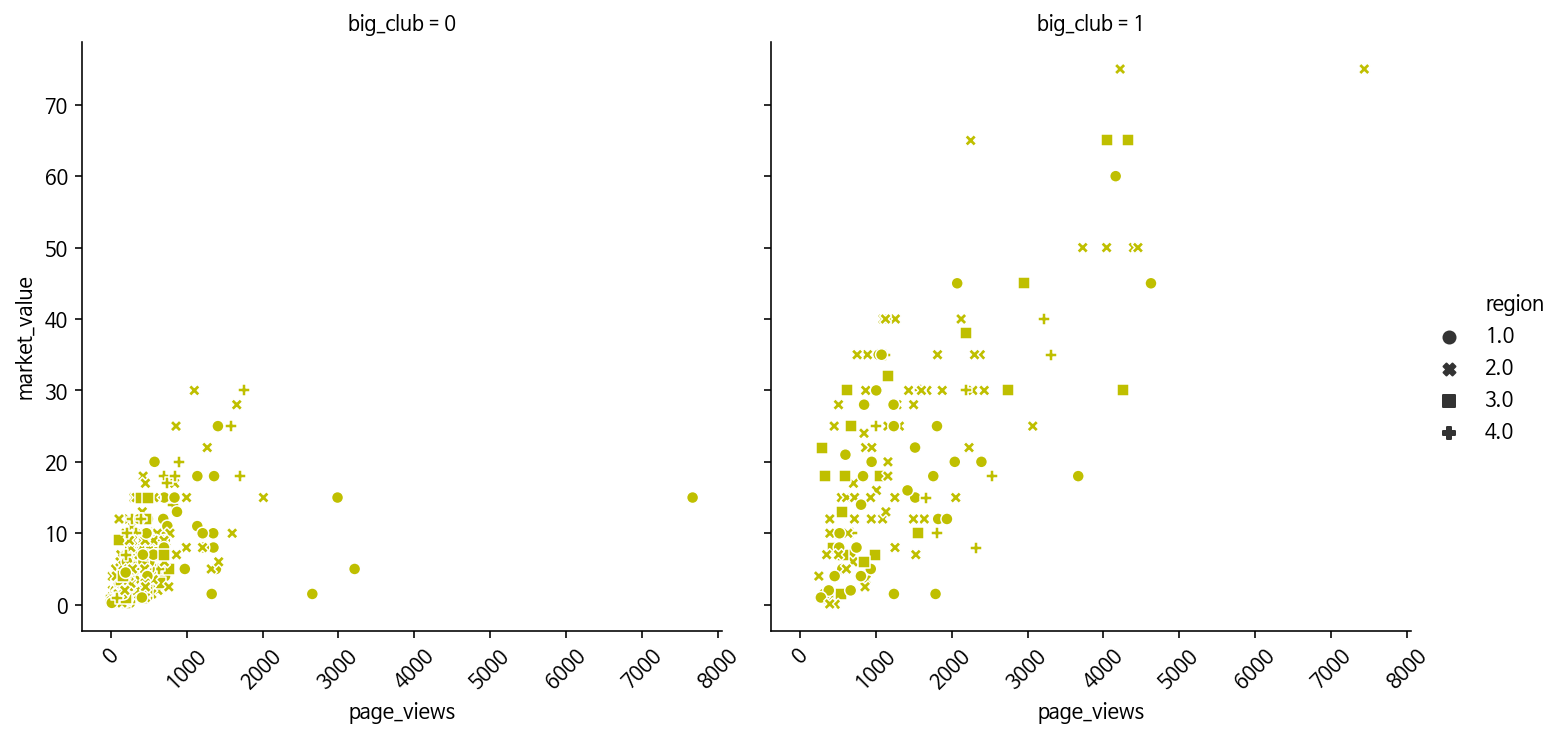

In [16]:
a = sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', style='region', col='big_club', color='y')
a.set_xticklabels(rotation=45)
plt.show()

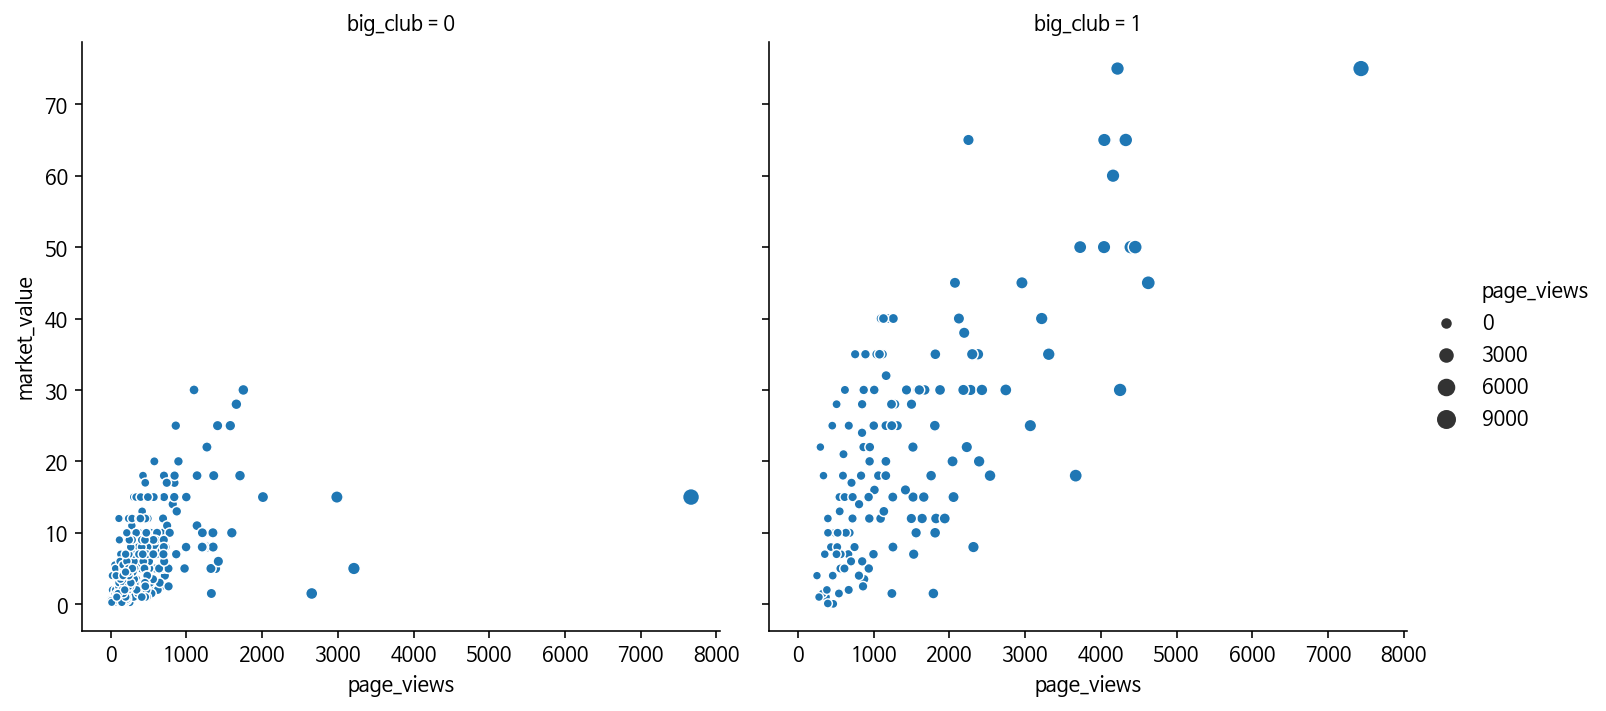

In [17]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', size='page_views', col='big_club')
plt.show()

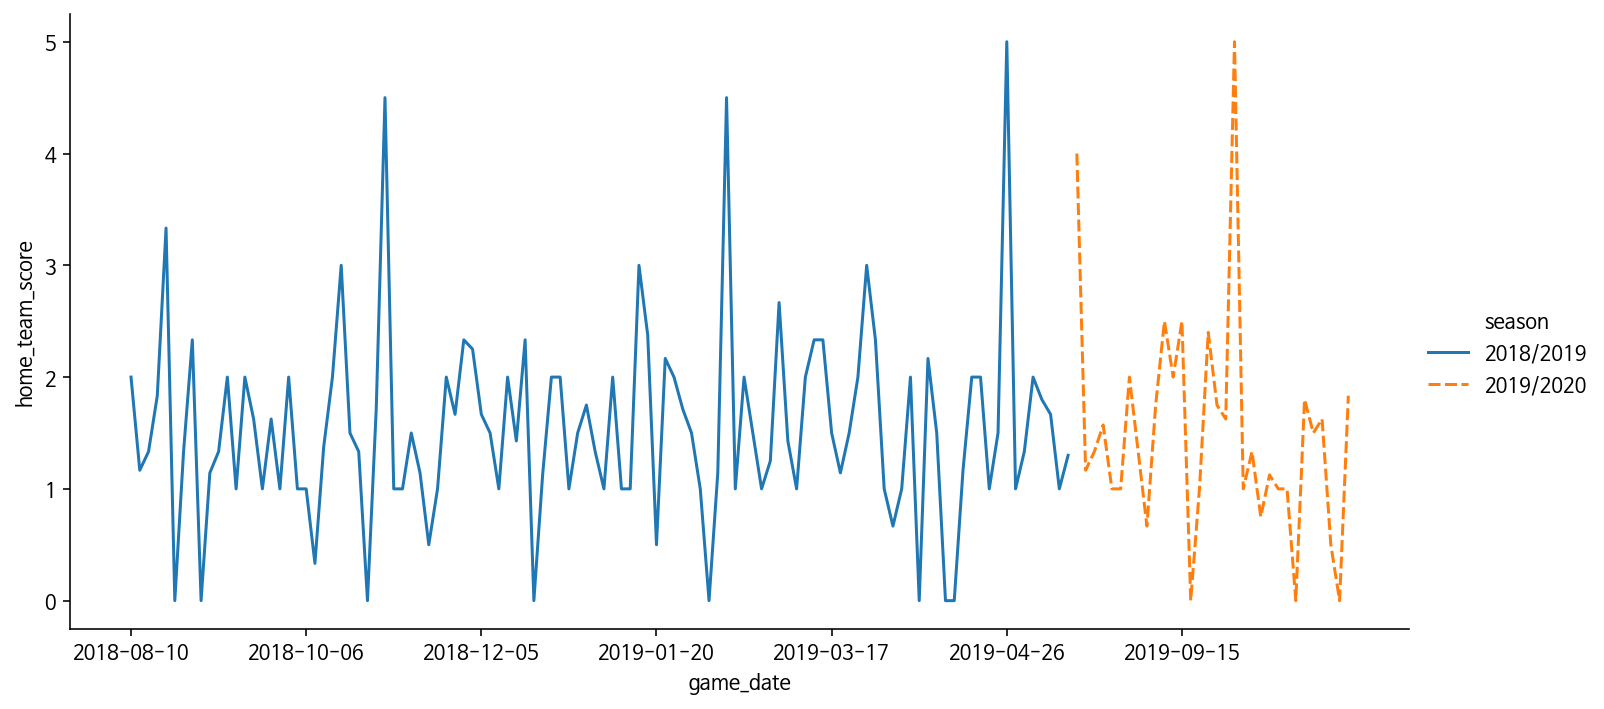

In [31]:
a = sns.relplot(x='game_date', y='home_team_score', data=epl2, kind='line', hue='season', style='season', ci=None, aspect=2)
a.set_xticklabels(step=20)
plt.show()

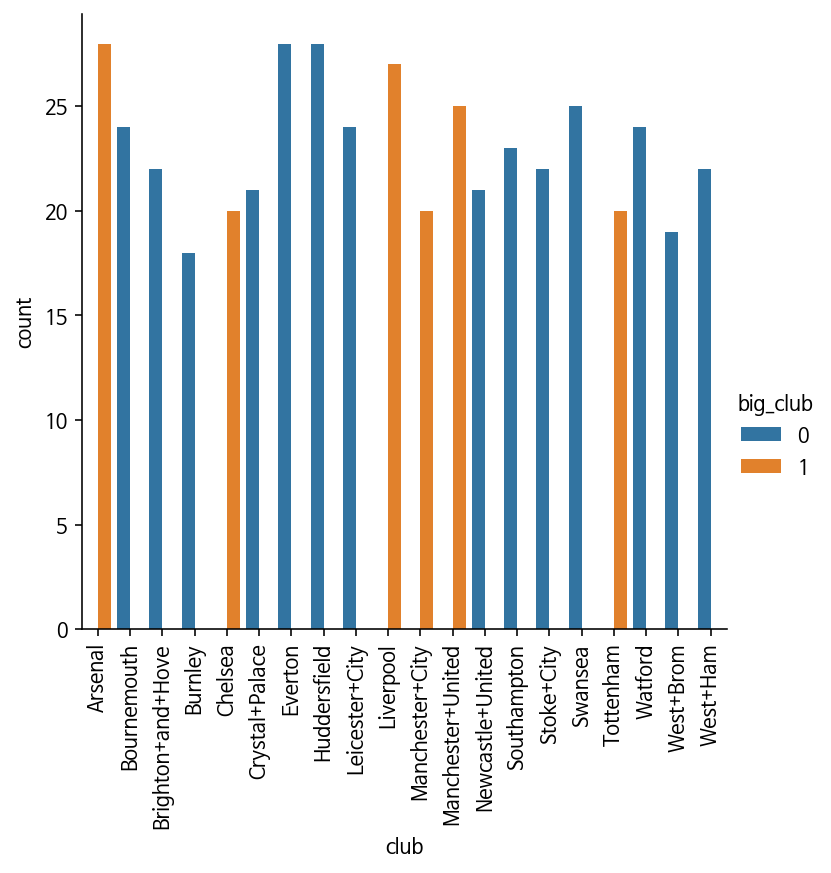

In [32]:
a = sns.catplot(x='club', data=epl, kind='count', hue='big_club')
a.set_xticklabels(rotation=90)
plt.show()

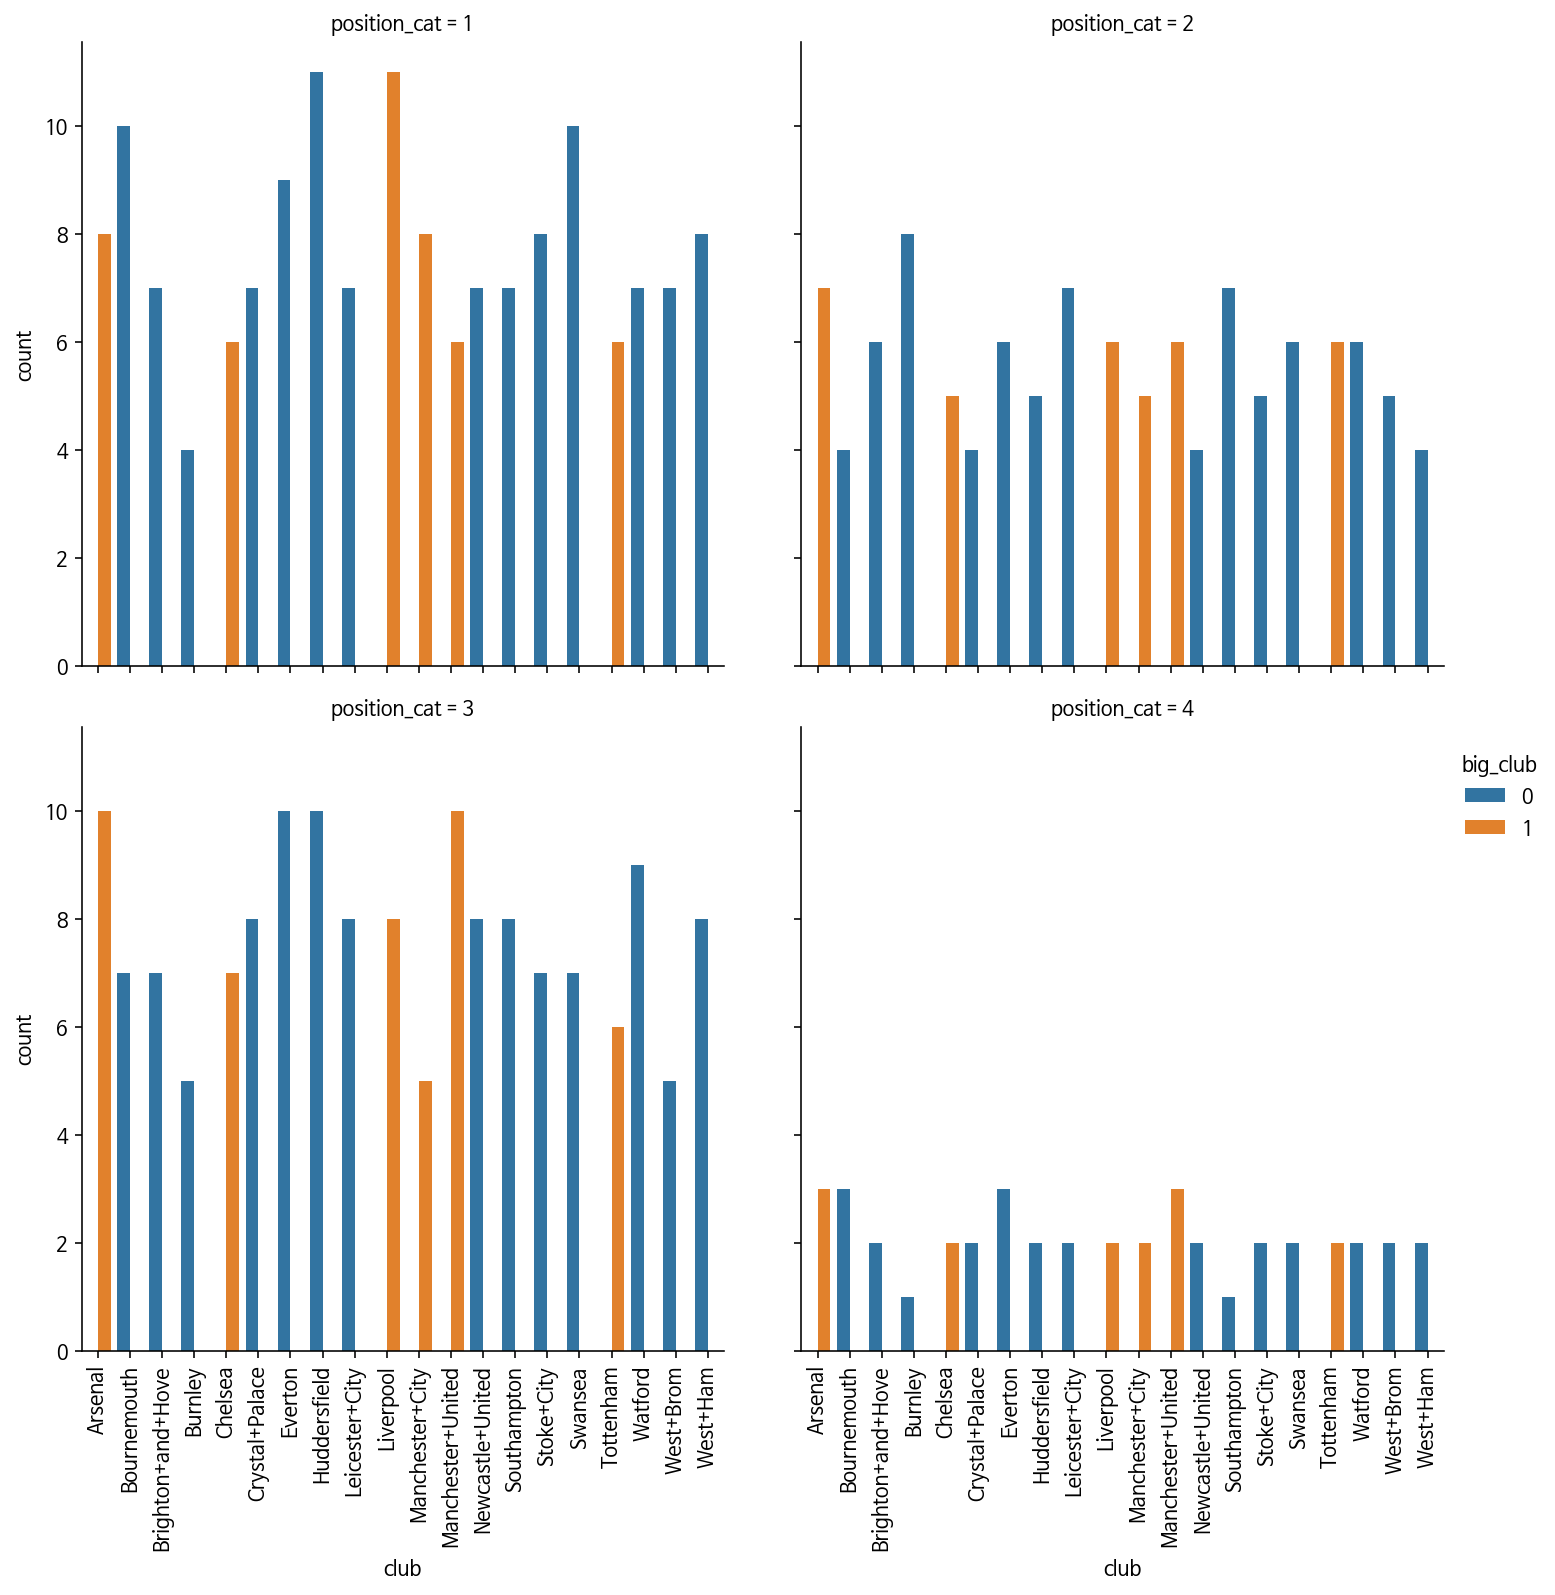

In [33]:
a = sns.catplot(x='club', data=epl, kind='count', hue='big_club', col='position_cat', col_wrap=2)
a.set_xticklabels(rotation=90)
plt.show()

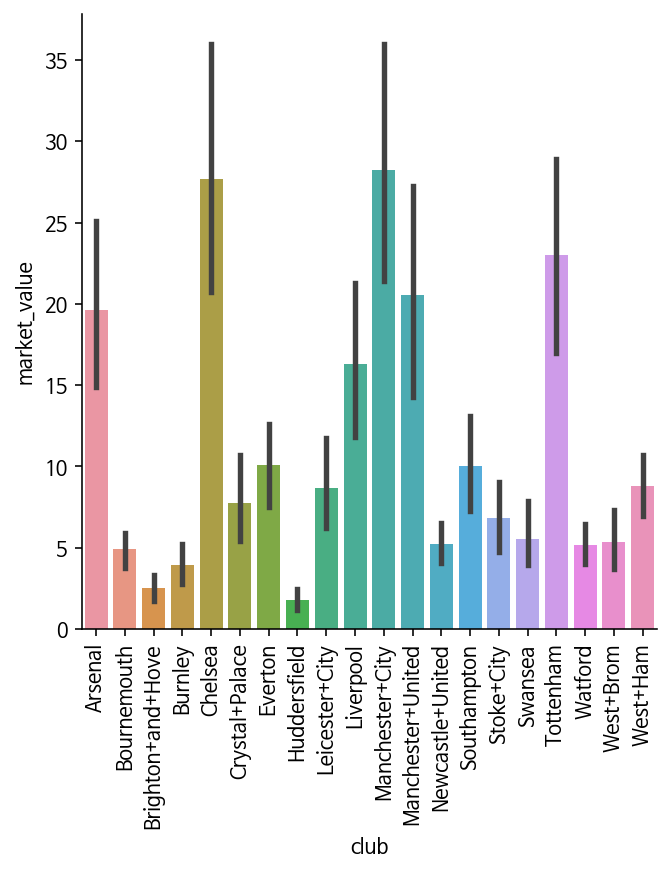

In [34]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='bar')
a.set_xticklabels(rotation=90)
plt.show()

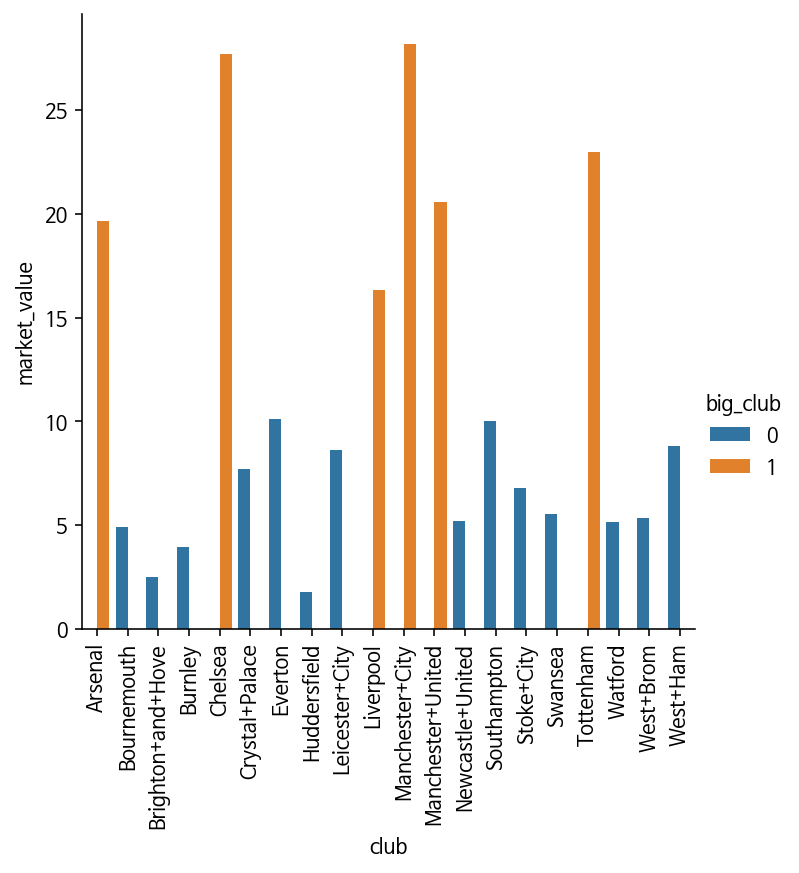

In [35]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='bar', ci=None, hue='big_club')
a.set_xticklabels(rotation=90)
plt.show()

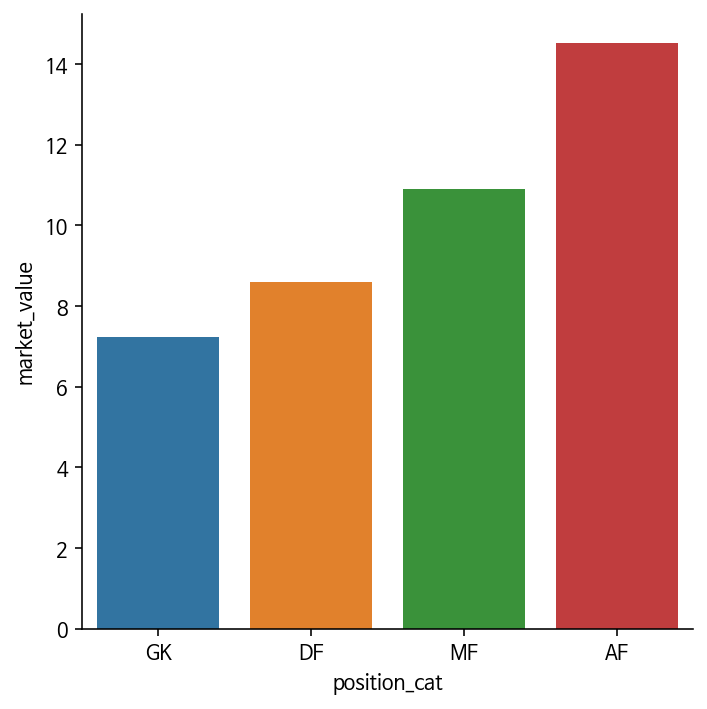

In [36]:
a = sns.catplot(x='position_cat', y='market_value', data=epl, kind='bar', ci=None, order=[4, 3, 2, 1])
a.set_xticklabels(['GK', 'DF', 'MF', 'AF'])
plt.show()

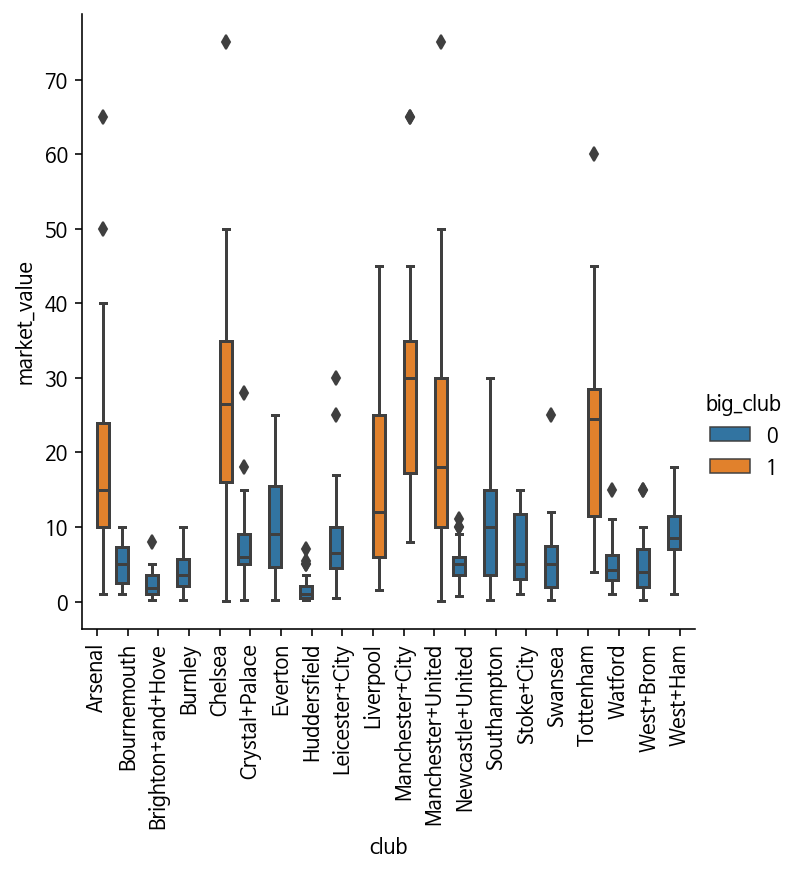

In [37]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club')
a.set_xticklabels(rotation=90)
plt.show()

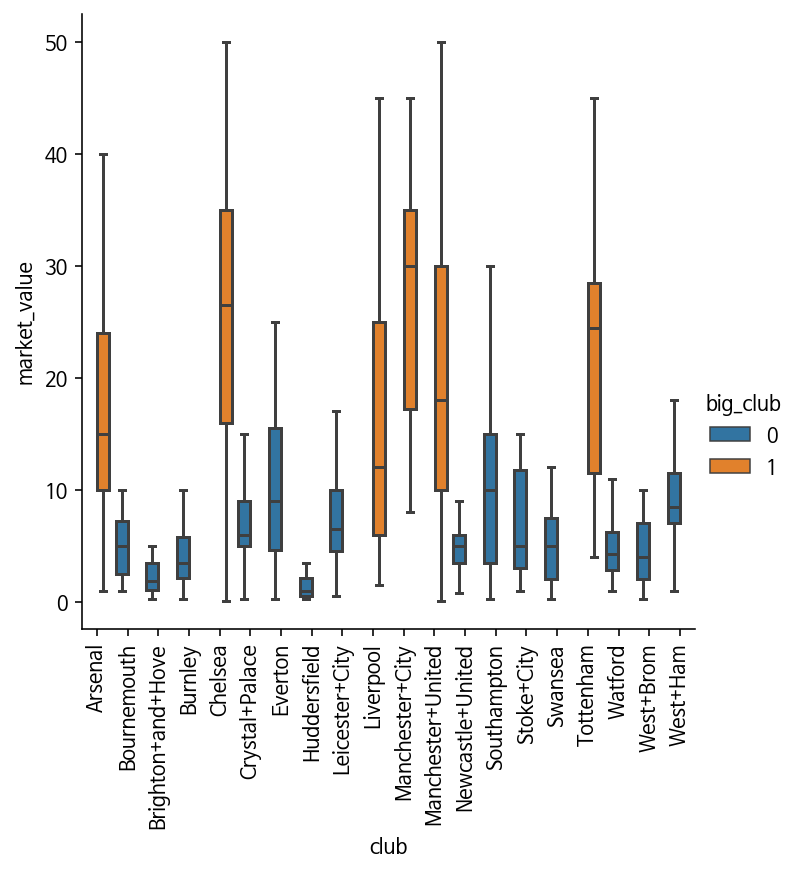

In [38]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club', sym='')
a.set_xticklabels(rotation=90)
plt.show()

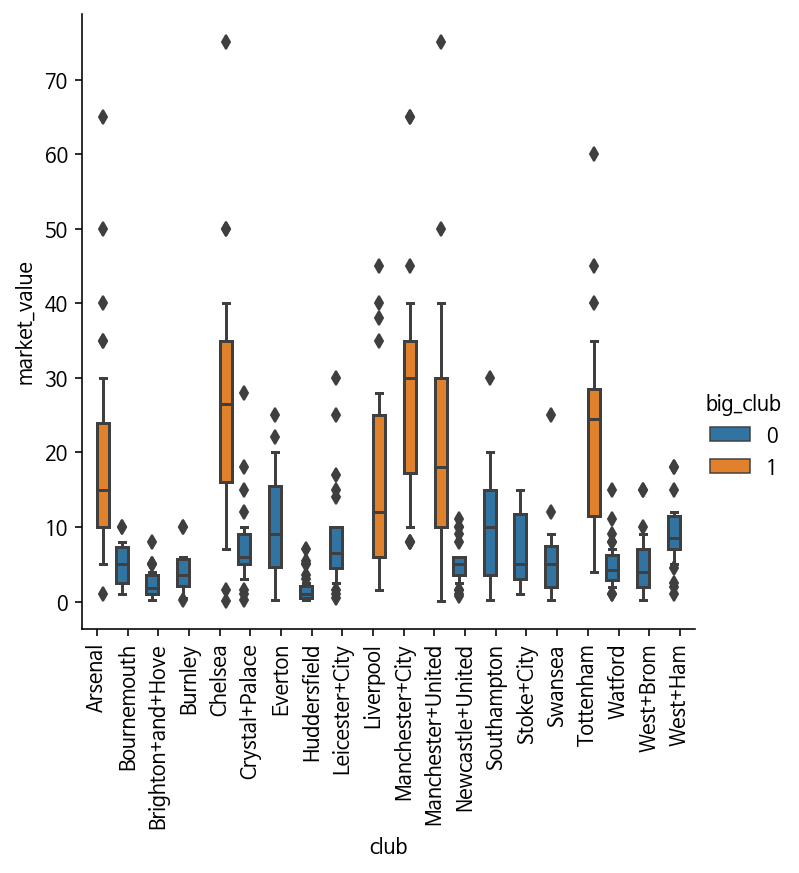

In [39]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club', whis=0.5)
a.set_xticklabels(rotation=90)
plt.show()

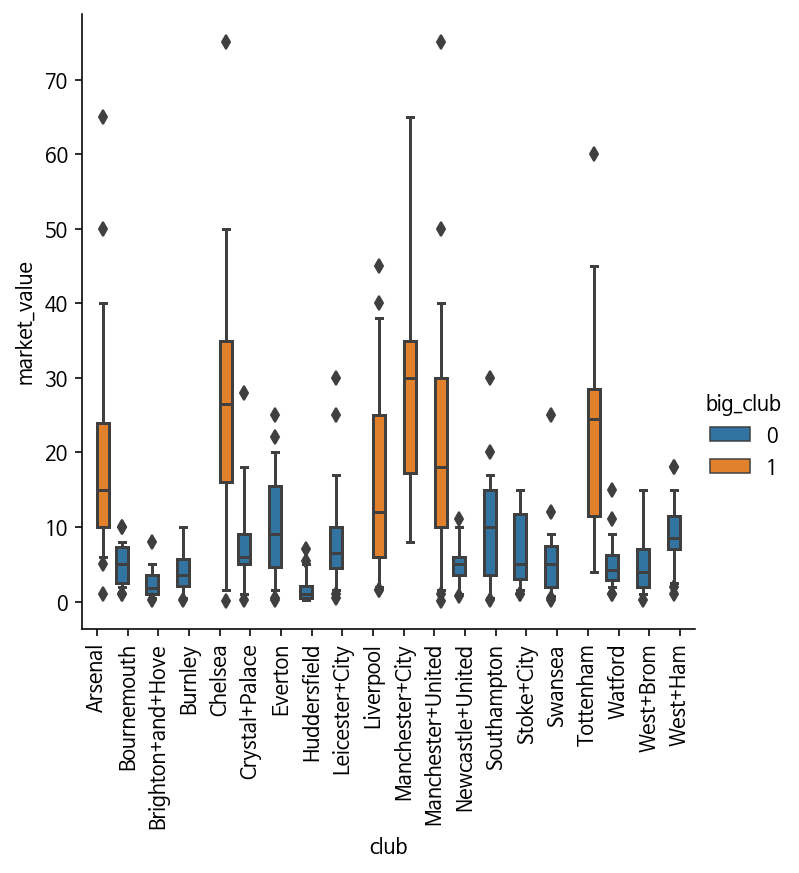

In [40]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='box', hue='big_club', whis=[5, 95])
a.set_xticklabels(rotation=90)
plt.show()

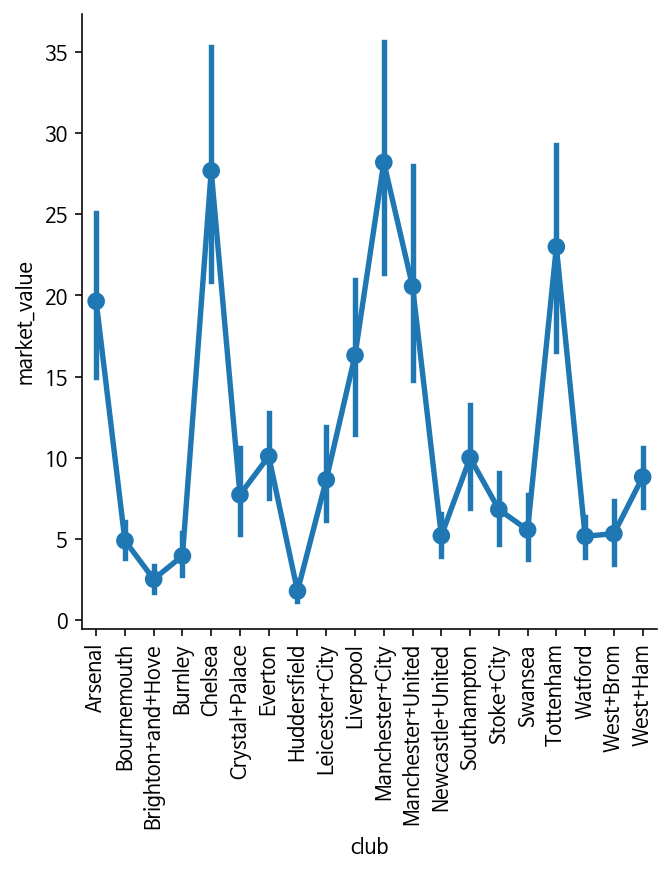

In [41]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='point')
a.set_xticklabels(rotation=90)
plt.show()

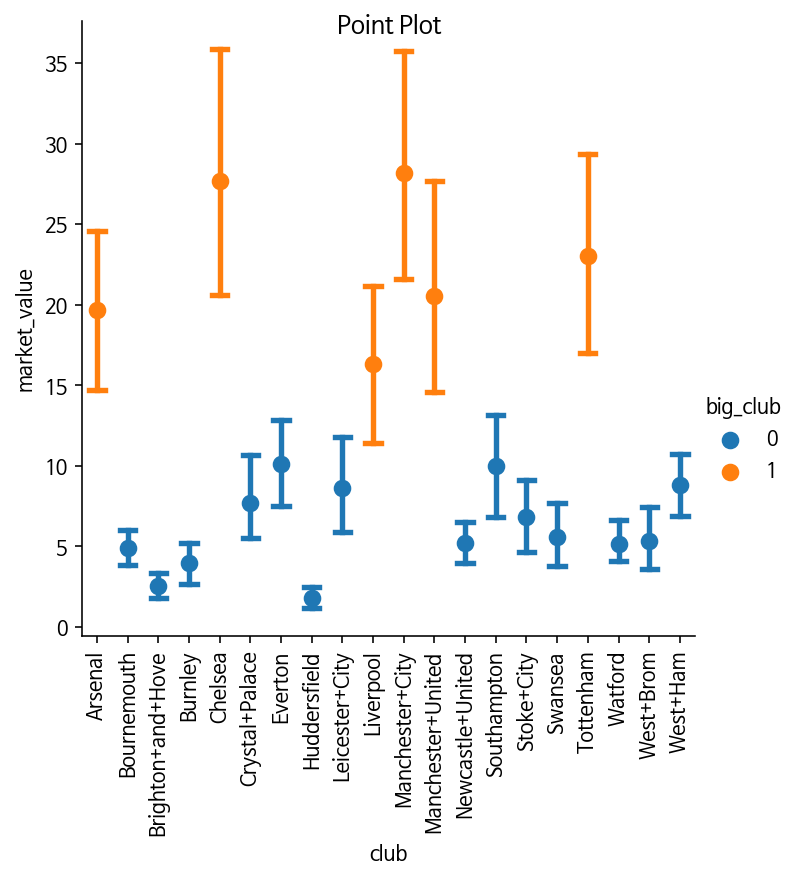

In [42]:
a = sns.catplot(x='club', y='market_value', data=epl, kind='point', hue='big_club', capsize=0.5, join=False)
a.set_xticklabels(rotation=90)
a.fig.suptitle('Point Plot')
plt.show()

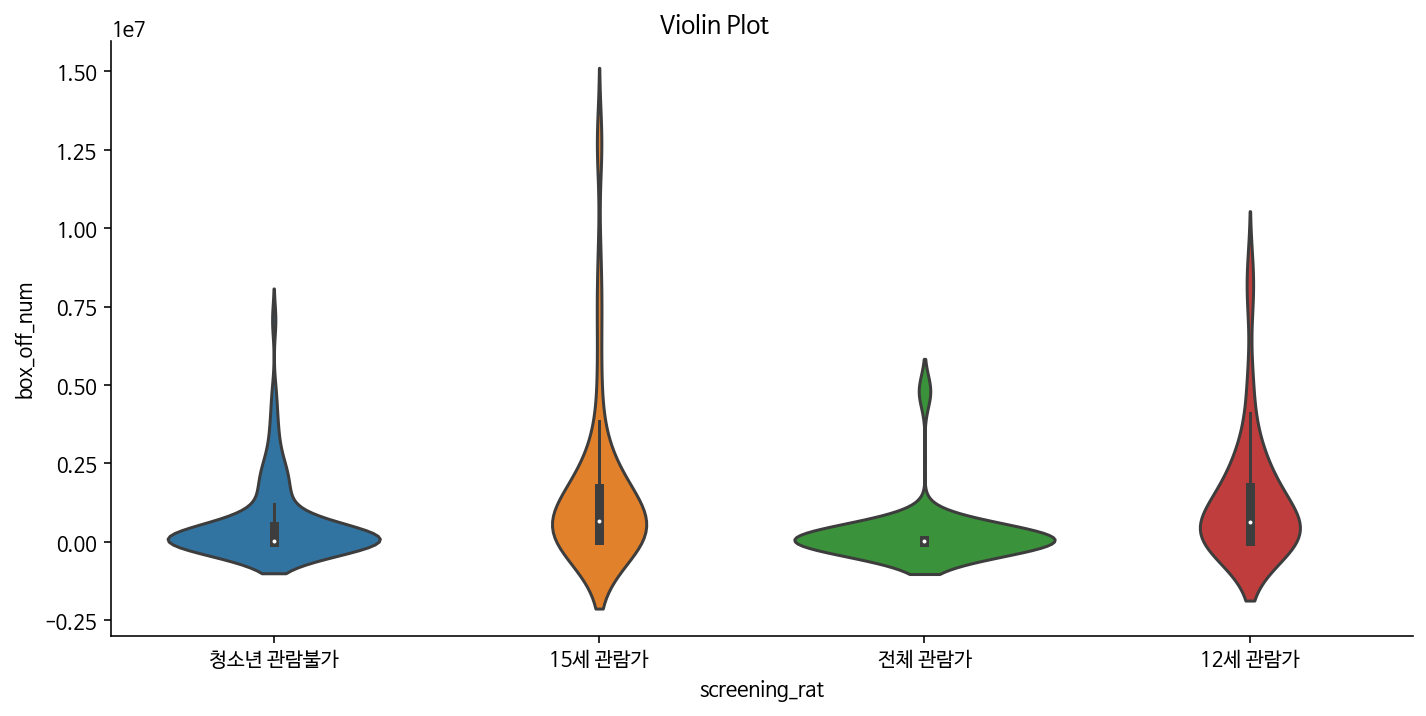

In [43]:
a = sns.catplot(x='screening_rat', y='box_off_num', data=movie, kind='violin', aspect=2)
a.fig.suptitle('Violin Plot')
plt.show()

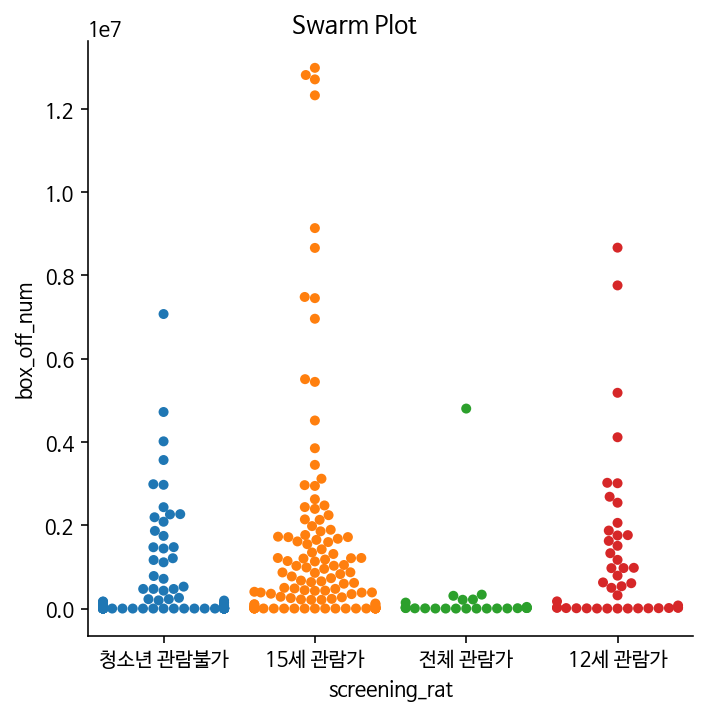

In [44]:
a = sns.catplot(x='screening_rat', y='box_off_num', data=movie, kind='swarm')
a.fig.suptitle('Swarm Plot')
plt.show()

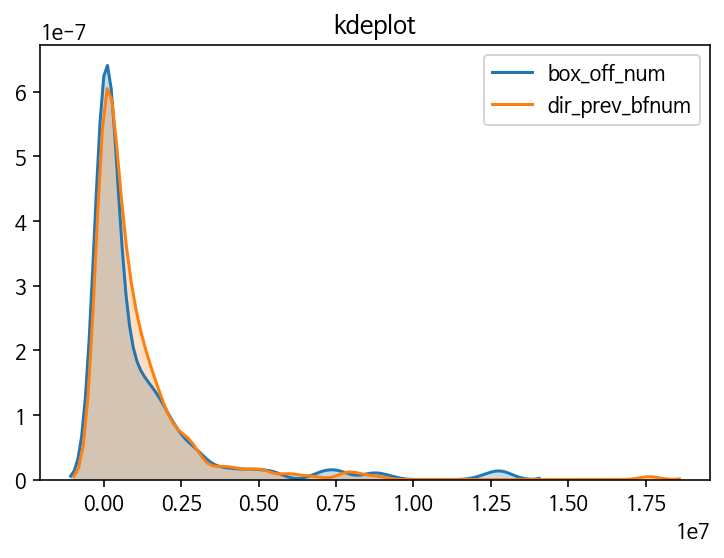

In [45]:
fig, ax = plt.subplots()
sns.kdeplot(data=movie['box_off_num'], shade=True)
sns.kdeplot(data=movie['dir_prev_bfnum'], shade=True)
ax.set_title('kdeplot')
plt.show()

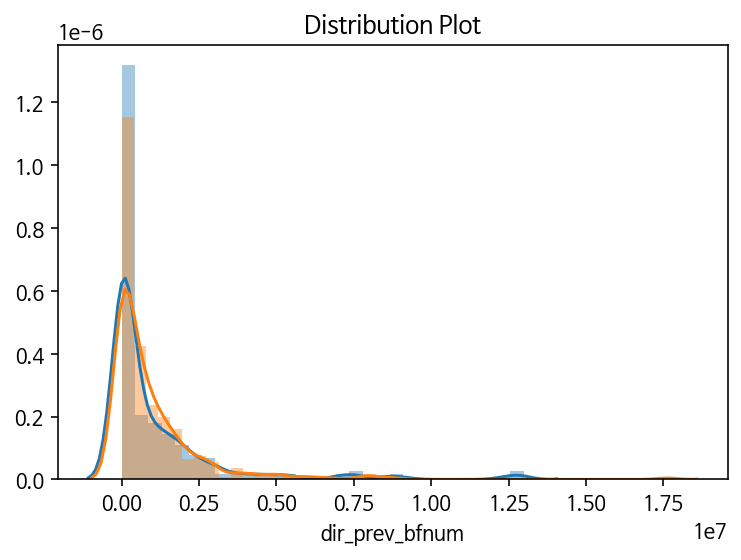

In [49]:
fig, ax = plt.subplots()
sns.distplot(movie['box_off_num'], kde=True)
sns.distplot(movie['dir_prev_bfnum'], kde=True)
ax.set_title('Distribution Plot')
plt.show()

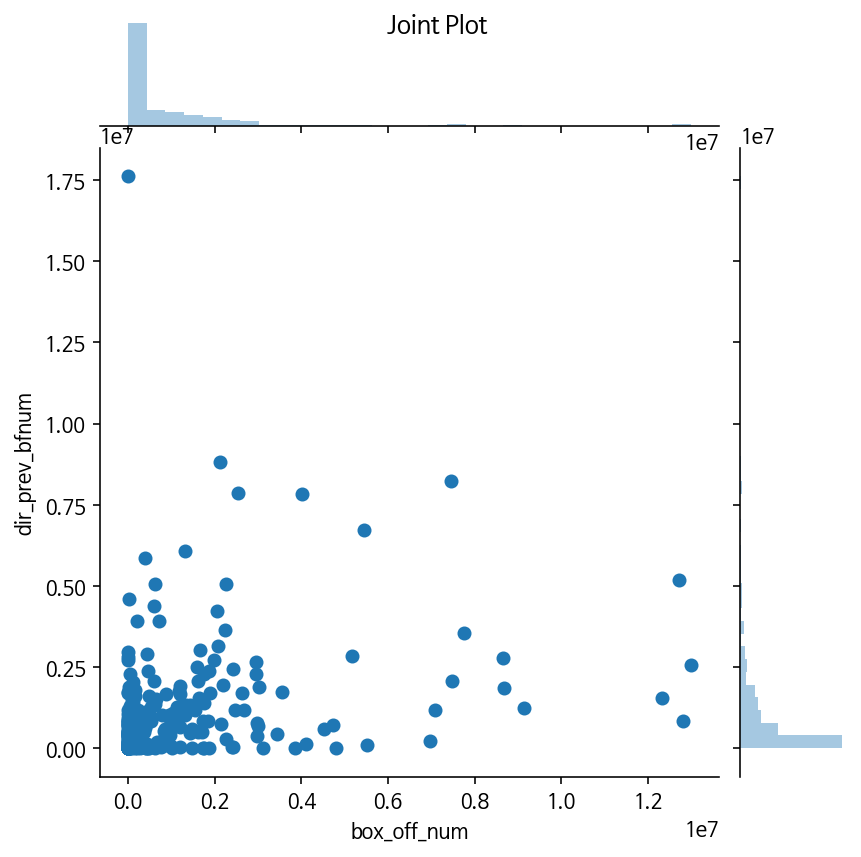

In [47]:
a = sns.jointplot(x='box_off_num', y='dir_prev_bfnum', data=movie)
a.fig.suptitle('Joint Plot')
plt.show()

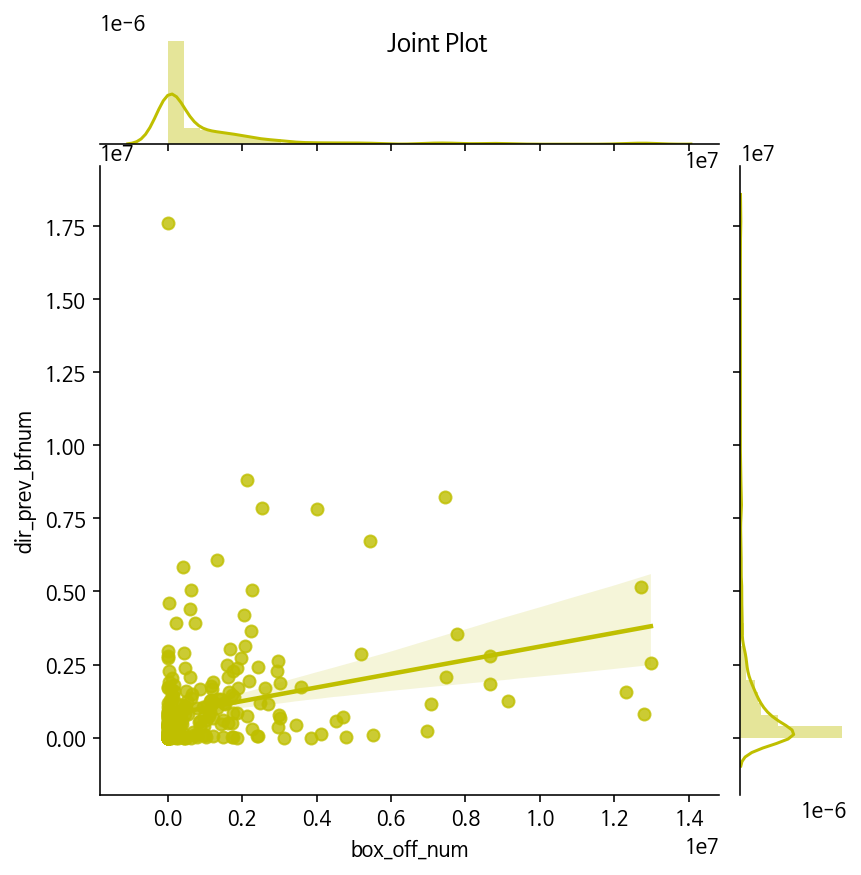

In [50]:
a = sns.jointplot(x='box_off_num', y='dir_prev_bfnum', data=movie, kind='reg', color='y')
a.fig.suptitle('Joint Plot')
plt.show()

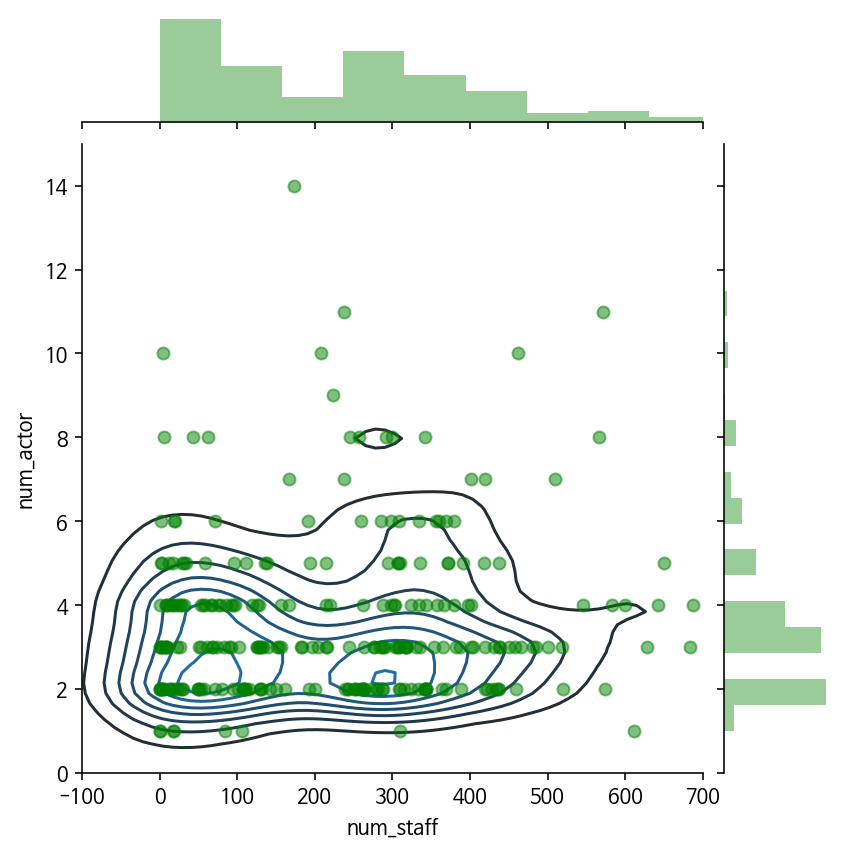

In [51]:
a = sns.jointplot(x=movie['num_staff'], y=movie['num_actor'], alpha=0.5, data=movie, color='g')
a.plot_joint(sns.kdeplot, zorder=0, n_levels=7)
a.ax_joint.set_xlim(-100, 700)
a.ax_joint.set_ylim(0, 15)
plt.show()

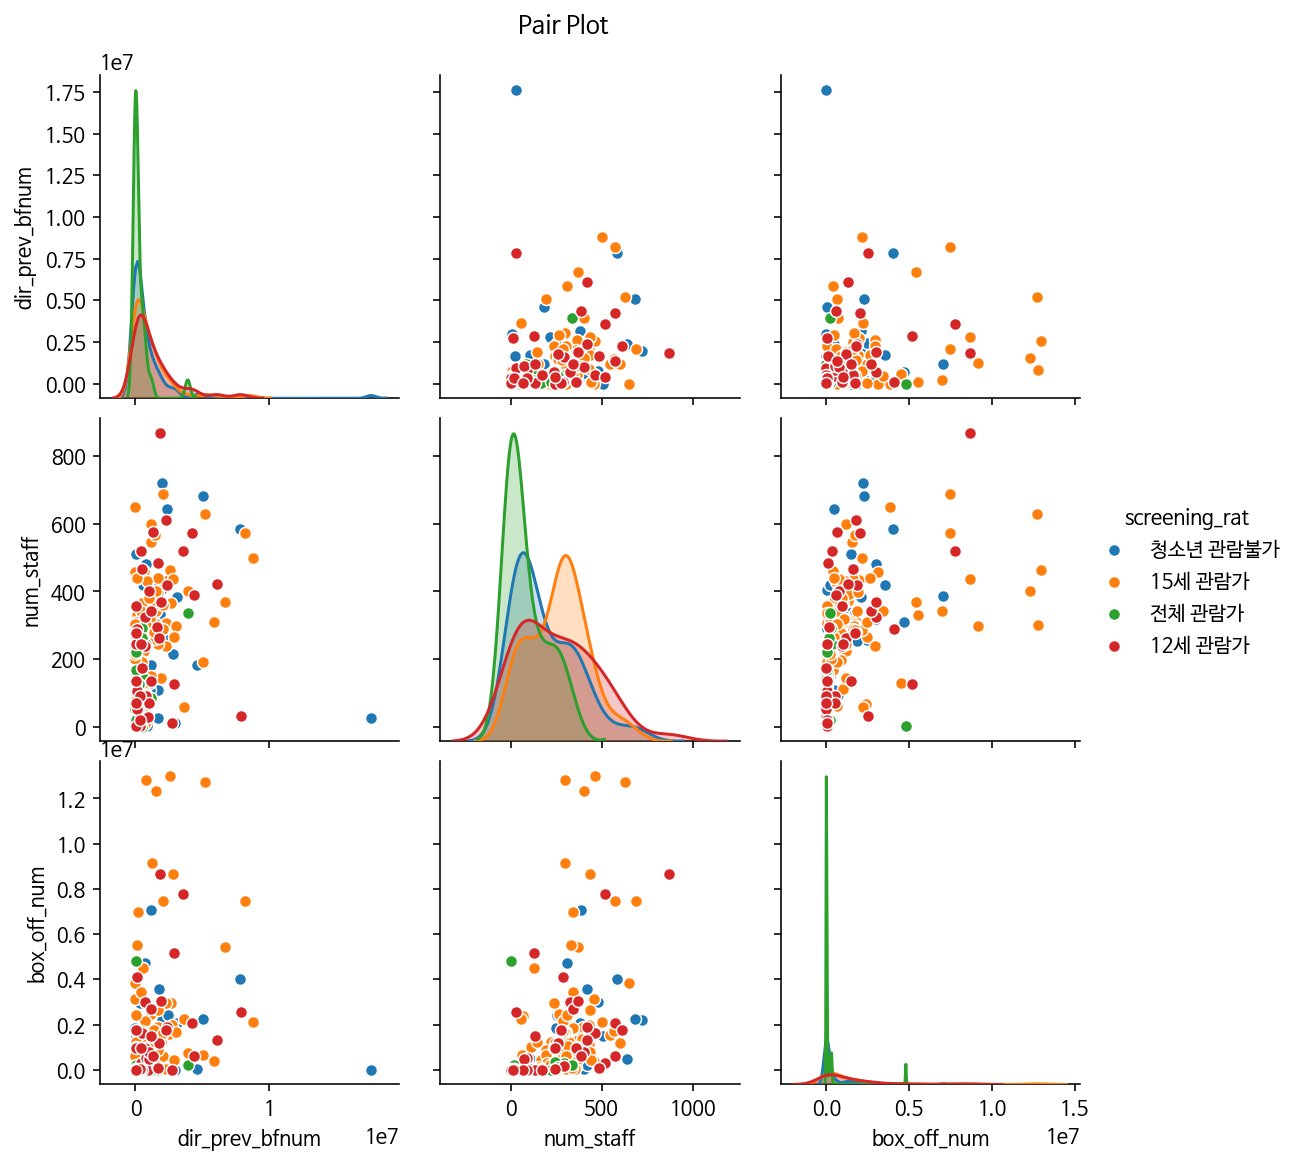

In [52]:
a = sns.pairplot(data=movie[['dir_prev_bfnum', 'num_staff', 'box_off_num', 'screening_rat']], hue='screening_rat')
a.fig.suptitle('Pair Plot', x=0.43, y=1.05)
plt.show()

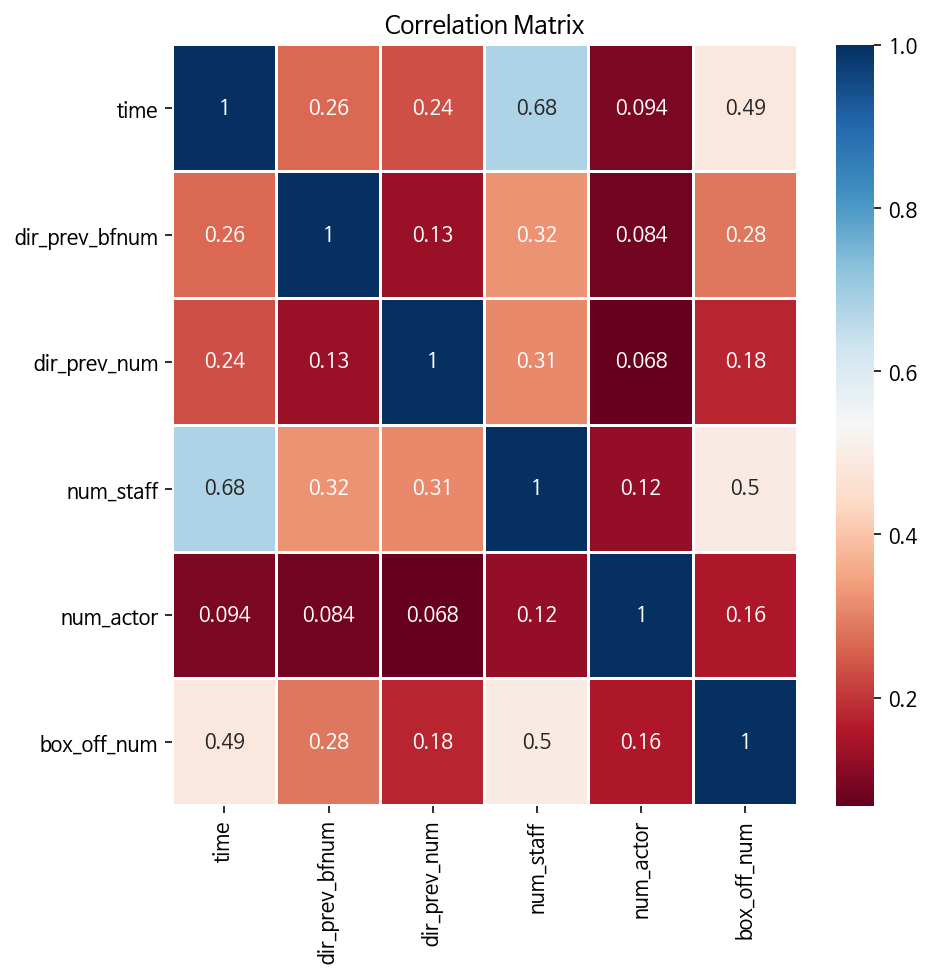

In [53]:
fig, ax = plt.subplots(figsize=(7, 7))
a = sns.heatmap(movie.corr(), annot=True, linewidths=1, cmap='RdBu')
ax.set_title('Correlation Matrix')
plt.show()

In [55]:
sns.set_style('whitegrid')

In [56]:
sns.set_palette('RdBu')

In [57]:
sns.set_context('poster')

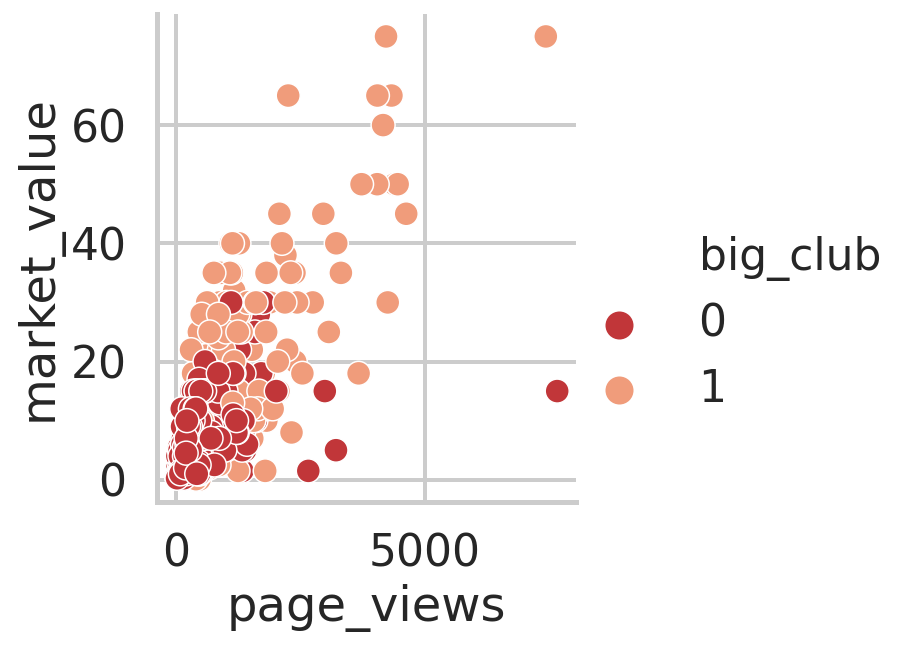

In [58]:
sns.relplot(x='page_views', y='market_value', data=epl, kind='scatter', hue='big_club')
plt.show()

In [59]:
sns.set_context('talk')

In [ ]:
fig, ax = plt.subplots(2,2, sharex=True, sharey=False, figsize=(20,9))
